**Importing Libraries**

In [1]:
#importing libraries in python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import  f1_score, precision_score,recall_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split,cross_val_score


# 1. Data Exploration

In this section, we will make a cursory investigation about the fraud audit dataset.
Since the main goal of this project is to construct a working model which has the capability of predicting the risk of fruad. 'Sector_score', 'LOCATION_ID'	'PARA_A', 'PARA_B',	'numbers', 'Money_Value', 'District_Loss', 'History', 'Score' represents **features** and The **target variable**, 'Risk', will be the variable we seek to predict. 

## Loading the dataset

In [2]:
df = pd.read_csv('audit_risk_data.csv')

Let's see the data set

In [3]:
df.head()

,Sector_score,LOCATION_ID,PARA_A,PARA_B,numbers,Money_Value,District_Loss,History,Score,Risk
0,3.89,23,4.18,2.50,5.0,3.38,2,0,2.4,1
1,3.89,6,0.00,4.83,5.0,0.94,2,0,2.0,0
2,3.89,6,0.51,0.23,5.0,0.00,2,0,2.0,0
3,3.89,6,0.00,10.80,6.0,11.75,2,0,4.4,1
4,3.89,6,0.00,0.08,5.0,0.00,2,0,2.0,0


In [4]:
# getting the info regarding the features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sector_score   776 non-null    float64
 1   LOCATION_ID    776 non-null    object 
 2   PARA_A         776 non-null    float64
 3   PARA_B         776 non-null    float64
 4   numbers        776 non-null    float64
 5   Money_Value    775 non-null    float64
 6   District_Loss  776 non-null    int64  
 7   History        776 non-null    int64  
 8   Score          776 non-null    float64
 9   Risk           776 non-null    int64  
dtypes: float64(6), int64(3), object(1)
memory usage: 60.8+ KB


Let's explore the target variable a little bit ('Risk')

<AxesSubplot:xlabel='Risk', ylabel='count'>

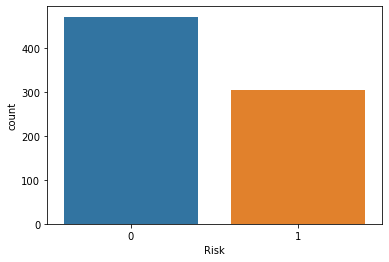

In [5]:
sns.countplot(df['Risk'])

In [6]:
df['Risk'].value_counts()

0    471
1    305
Name: Risk, dtype: int64

There are more non-fraudant firms overall.

# 2. Data Preprocessing

Let's explore the features accourding to the info we got from the dataset.

As it is indicated in the data types, the 'LOCATION_ID' column contains non-numeric data. let's find more details:

In [7]:
df['LOCATION_ID'].unique()

array(['23', '6', '7', '8', '13', '37', '24', '3', '4', '14', '5', '20',
       '19', '21', '22', '9', '11', '12', '29', '30', '38', '31', '2',
       '32', '16', '33', '15', '36', '34', '18', '25', '39', '27', '35',
       '40', '41', '42', '1', '28', 'LOHARU', 'NUH', 'SAFIDON', '43',
       '44', '17'], dtype=object)

Let's find out how many of the data points in 'LOCATION_ID' are 'LOHARU', 'NUH'and 'SAFIDON' by looking at the histogram of this feature

<AxesSubplot:xlabel='LOCATION_ID', ylabel='Count'>

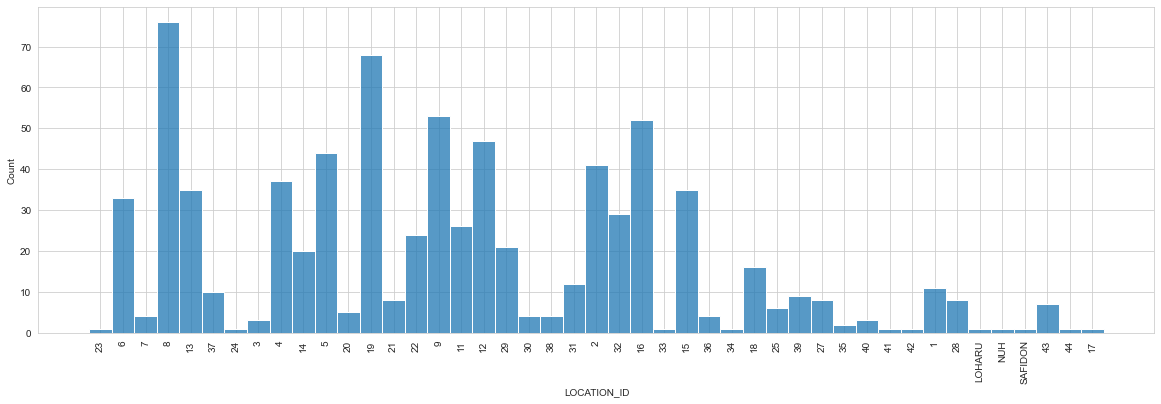

In [8]:
sns.set_style('whitegrid')
plt.figure(figsize=(20, 6))
plt.xticks(rotation=90)
sns.histplot(data=df, x='LOCATION_ID')

As there are just 3 points out of 776 data points in total that their loction IDs indicated by names, we can cut them off the df without any noticable effect on the result.

In [9]:
df = df[~df['LOCATION_ID'].isin(['LOHARU', 'NUH', 'SAFIDON'])].reset_index(drop=True)

In [10]:
# checking the df['LOCATION_ID'] again
df['LOCATION_ID'].unique()

array(['23', '6', '7', '8', '13', '37', '24', '3', '4', '14', '5', '20',
       '19', '21', '22', '9', '11', '12', '29', '30', '38', '31', '2',
       '32', '16', '33', '15', '36', '34', '18', '25', '39', '27', '35',
       '40', '41', '42', '1', '28', '43', '44', '17'], dtype=object)

As you can see the data type till is str, now we can easily change the data type to float

In [11]:
df['LOCATION_ID'] = df['LOCATION_ID'].astype(float)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 773 entries, 0 to 772
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sector_score   773 non-null    float64
 1   LOCATION_ID    773 non-null    float64
 2   PARA_A         773 non-null    float64
 3   PARA_B         773 non-null    float64
 4   numbers        773 non-null    float64
 5   Money_Value    772 non-null    float64
 6   District_Loss  773 non-null    int64  
 7   History        773 non-null    int64  
 8   Score          773 non-null    float64
 9   Risk           773 non-null    int64  
dtypes: float64(7), int64(3)
memory usage: 60.5 KB


## Data Imputation

In [13]:
# checking the number of missing values in each columns
df.isnull().sum()

Sector_score     0
LOCATION_ID      0
PARA_A           0
PARA_B           0
numbers          0
Money_Value      1
District_Loss    0
History          0
Score            0
Risk             0
dtype: int64

The Money_Value has one null value so I replcae the null value with the mean value of this Money_Value column

In [14]:
#replacing the missing values in Money_Value column with mean value
df['Money_Value'].fillna((df['Money_Value'].mean()), inplace=True)

In [15]:
# again checking the null values
df.isnull().sum()

Sector_score     0
LOCATION_ID      0
PARA_A           0
PARA_B           0
numbers          0
Money_Value      0
District_Loss    0
History          0
Score            0
Risk             0
dtype: int64

## Data Outliers

In [16]:
df.describe()

,Sector_score,LOCATION_ID,PARA_A,PARA_B,numbers,Money_Value,District_Loss,History,Score,Risk
count,773.000000,773.000000,773.000000,773.000000,773.000000,773.000000,773.000000,773.000000,773.000000,773.000000
mean,20.255149,14.856404,2.457983,10.841903,5.067917,14.191093,2.507115,0.104787,2.705304,0.394567
std,24.339709,9.891317,5.688509,50.176308,0.264928,66.687203,1.230659,0.532022,0.859470,0.489074
min,1.850000,1.000000,0.000000,0.000000,5.000000,0.000000,2.000000,0.000000,2.000000,0.000000
25%,2.370000,8.000000,0.210000,0.000000,5.000000,0.000000,2.000000,0.000000,2.000000,0.000000
50%,3.890000,13.000000,0.880000,0.410000,5.000000,0.090000,2.000000,0.000000,2.400000,0.000000
75%,55.570000,19.000000,2.480000,4.160000,5.000000,5.690000,2.000000,0.000000,3.400000,1.000000
max,59.850000,44.000000,85.000000,1264.630000,9.000000,935.030000,6.000000,9.000000,5.200000,1.000000


It can be seen that some of the features ight have outliers as for instance the mean of 'PARA_A' is 2.4 while the max of this features is 85. In the following by using the IQR methd I will find the outliers

In [17]:
def find_outliers_IQR(df):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR=q3-q1
    outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
    return outliers

In [18]:
for col in df.columns:
    outliers = find_outliers_IQR(df[col])
    print('number of outliers in ' + col + ': %.2f' %len(outliers))

number of outliers in Sector_score: 0.00
number of outliers in LOCATION_ID: 40.00
number of outliers in PARA_A: 82.00
number of outliers in PARA_B: 138.00
number of outliers in numbers: 70.00
number of outliers in Money_Value: 116.00
number of outliers in District_Loss: 123.00
number of outliers in History: 50.00
number of outliers in Score: 0.00
number of outliers in Risk: 0.00


Accourding to the dataset, just the columns: PARA_A, PARA_B, Money_value are continioues and we will just trim the dataset upon the outliers in these columns. 
As Our dataset size is limited to 773 rows, if we remove all the outliers detected by the IQR method, then we will lose a notable amount of our data, so I would like to plot the histogram of the features with outliers to see the outliers and decide upon them.

In [19]:
def hist_box_plot(feature):    
    plt.figure(figsize=(16,8))
    plt.subplot(2,2,1)
    sns.distplot(df[feature])
    plt.subplot(2,2,2)
    sns.boxplot(df[feature])

### PARA_A

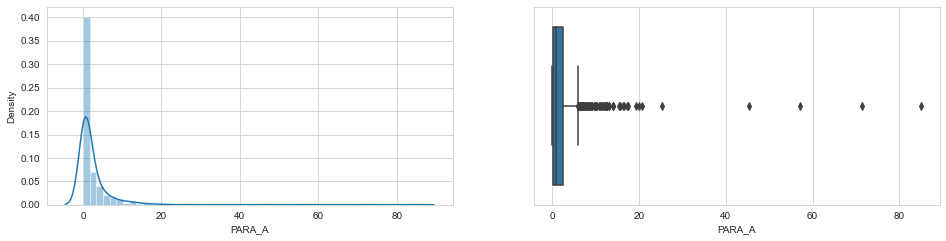

In [20]:
hist_box_plot('PARA_A')

So based on the distribution plot and box plot, for PARA_A, data points after 20 are outliers, so by removing these outliers we have:

In [21]:
df = df[df['PARA_A'] < 20]

Let's compare the distribution plots now

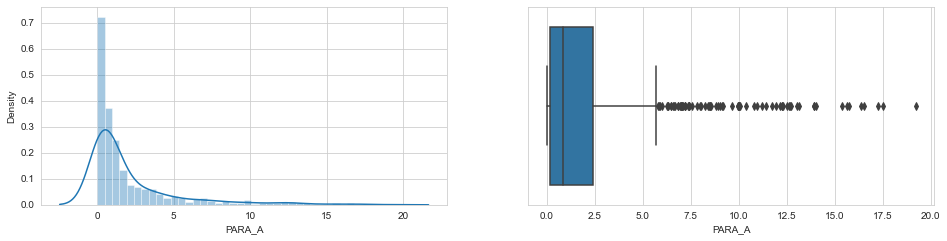

In [22]:
hist_box_plot('PARA_A')

Now repeating this process for all the features with outliers

### PARA_B

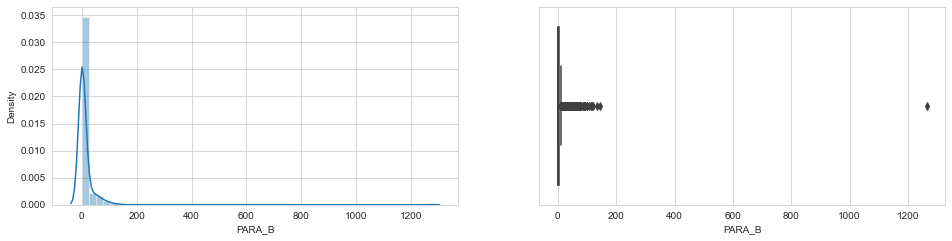

In [23]:
hist_box_plot('PARA_B')

In [24]:
df = df[df['PARA_B'] < 200]

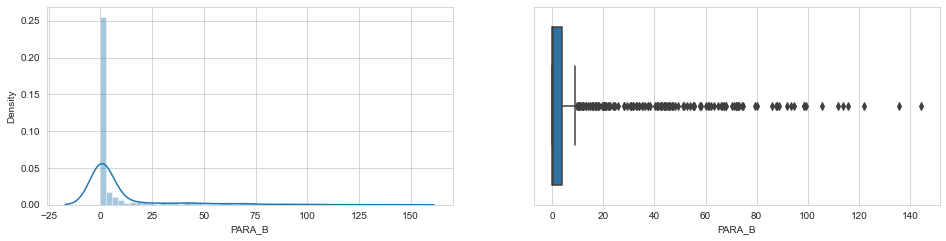

In [25]:
hist_box_plot('PARA_B')

### Money_Value

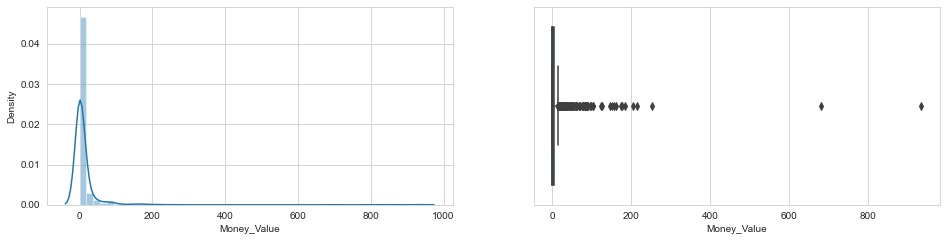

In [26]:
hist_box_plot('Money_Value')

In [27]:
df = df[df['Money_Value'] < 400]

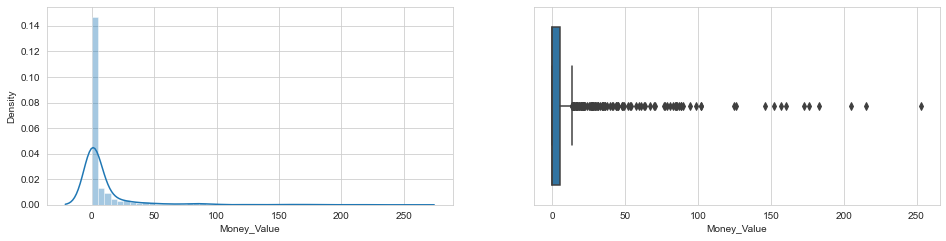

In [28]:
hist_box_plot('Money_Value')

Let's see the pair plot of the dataset and the distribution of each risk class on the plots.

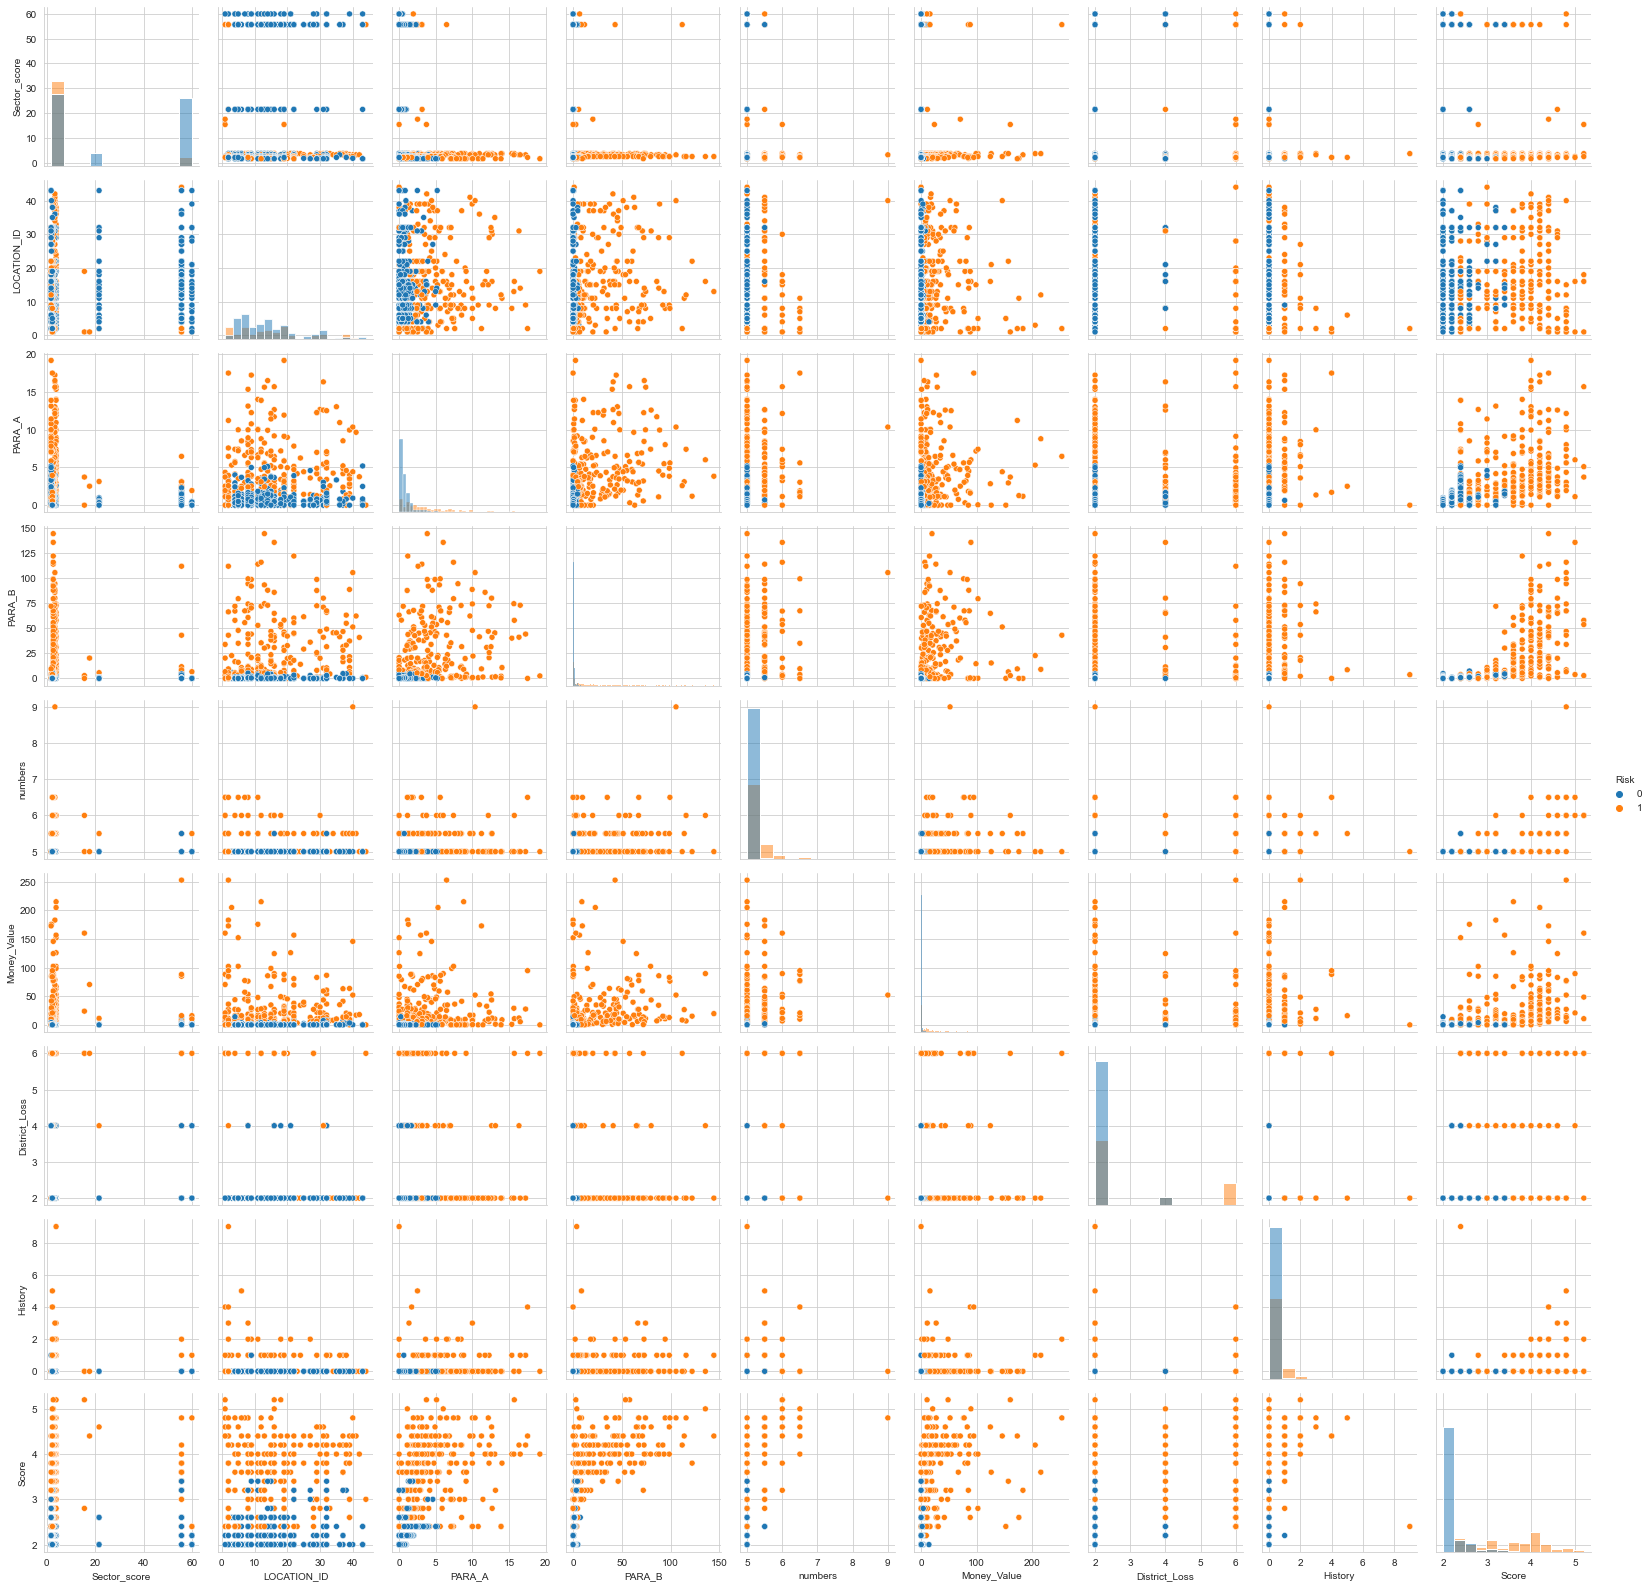

In [29]:
g = sns.PairGrid(df, hue='Risk')
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

## Data Correlation

Now let's explore correlation between the features.

In [30]:
df.corr(method='pearson')

,Sector_score,LOCATION_ID,PARA_A,PARA_B,numbers,Money_Value,District_Loss,History,Score,Risk
Sector_score,1.000000,-0.064744,-0.340673,-0.249380,-0.151570,-0.178639,-0.105978,-0.111949,-0.334954,-0.392967
LOCATION_ID,-0.064744,1.000000,0.086786,0.127861,0.022994,-0.001755,-0.101318,-0.072847,0.108130,0.075672
PARA_A,-0.340673,0.086786,1.000000,0.461513,0.256286,0.252005,0.059243,0.193563,0.612107,0.540570
PARA_B,-0.249380,0.127861,0.461513,1.000000,0.384749,0.343521,-0.027524,0.205409,0.704105,0.498267
numbers,-0.151570,0.022994,0.256286,0.384749,1.000000,0.319072,0.114902,0.195742,0.507553,0.305204
Money_Value,-0.178639,-0.001755,0.252005,0.343521,0.319072,1.000000,0.079885,0.194293,0.481383,0.422834
District_Loss,-0.105978,-0.101318,0.059243,-0.027524,0.114902,0.079885,1.000000,0.039262,0.187034,0.398170
History,-0.111949,-0.072847,0.193563,0.205409,0.195742,0.194293,0.039262,1.000000,0.311570,0.233772
Score,-0.334954,0.108130,0.612107,0.704105,0.507553,0.481383,0.187034,0.311570,1.000000,0.782388
Risk,-0.392967,0.075672,0.540570,0.498267,0.305204,0.422834,0.398170,0.233772,0.782388,1.000000


<AxesSubplot:>

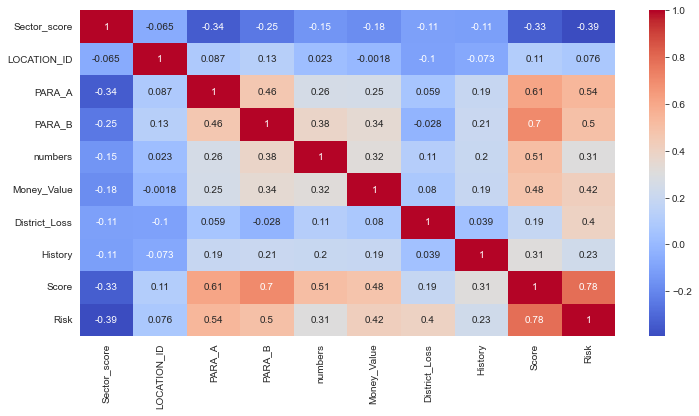

In [31]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(method='pearson'),annot=True,cmap='coolwarm')

In [32]:
features = df.drop(['Risk'],axis=1)

<AxesSubplot:title={'center':'Correlation with Risk'}>

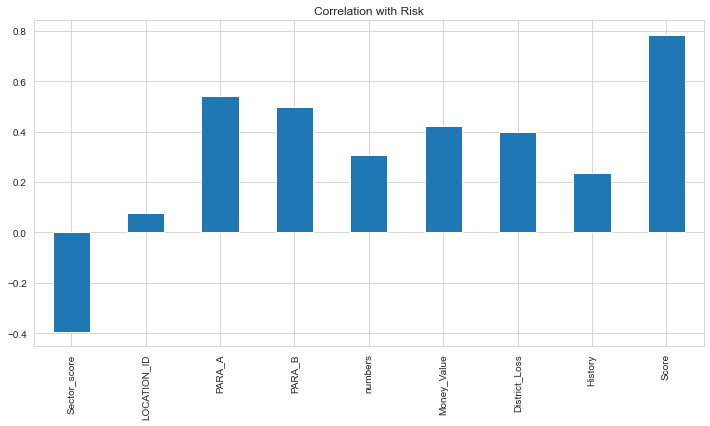

In [33]:
features.corrwith(df.Risk).plot.bar(figsize = (12, 6), title = "Correlation with Risk", rot = 90, grid = True)

As it is shown by the heatmap, the risk of being fraud is mostly correlated with the Score column.

# 3.  Model Development

### Setting up the Features and the Target

In [34]:
X = df.drop('Risk',axis=1)
y = df['Risk']

###  Splitting Data to Train Test sets

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,stratify=y, random_state = 101)

In [36]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", y_train.shape)
print("X_test shape:", y_test.shape)

X_train shape: (610, 9)
X_test shape: (153, 9)
Y_train shape: (610,)
X_test shape: (153,)


Let's see the **distribition of classes** in test and train sets:

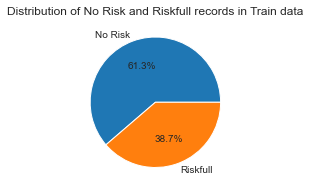

In [37]:
plt.figure(figsize = (5,3))
labels = ["No Risk", "Riskfull"]
plt.pie(y_train.value_counts().values,labels = labels, autopct='%.1f%%')
plt.title("Distribution of No Risk and Riskfull records in Train data")
plt.show()

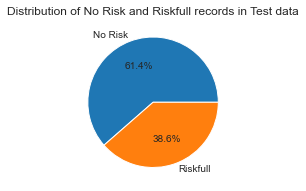

In [38]:
plt.figure(figsize = (5,3))
labels = ["No Risk", "Riskfull"]
plt.pie(y_test.value_counts().values,labels = labels, autopct='%.1f%%')
plt.title("Distribution of No Risk and Riskfull records in Test data")
plt.show()

It can be clearly seen from the pie chart that the dataset is **balanced** and the distribition of classes in both sets are fair. So we will are good to go to the next step.

### Scaling the data

In [39]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Classification Models

### Cross Validation

Using Cross Validation can be benefitial as we can verify how accurate our model is on multiple and different subsets of data. 

In [40]:
kfold = KFold(n_splits=10,shuffle=True, random_state=10)

### Grid Search

In order to optimize a learning algorithms, we can apply grid search by specifying the parameters, and the possible values of those parameters. **The grid search then returns the best parameter values for our model**, after fitting the supplied data. This takes out the guess-work involved in seeking out the opitimal paramter values for a classifier.

In [41]:
def grid_search(model, grid_param):    
    grid = GridSearchCV(estimator=model,
                         param_grid=grid_param,
                         scoring='accuracy',
                         cv=10,
                         verbose=1,
                         n_jobs=-1)

    grid.fit(X_train, y_train)
    print("Best parameters: {}".format(grid.best_params_))
    model_best = grid.best_estimator_
    return model_best

### Model Evaluation

In [42]:
def model_eval_df(model):
    
    # cross validation
    cross_acc = cross_val_score(estimator = model, X = X_train, y = y_train, cv = kfold, scoring='accuracy').mean()
    
    # Evaluation
    y_pred = model.predict(X_test)
    
    #confusion matrix
    sns.heatmap(confusion_matrix(y_test,y_pred) ,linewidths=0.5, annot=True, fmt='d', cmap='coolwarm')
    plt.title('Confusion Matrix')
    plt.xlabel('predicted value')
    plt.ylabel('true value')
    plt.show()
    print('Classification Report : \n',classification_report(y_test,y_pred, target_names = ['R', 'NR' ]))
    
    acc= accuracy_score(y_test, y_pred)
    roc=roc_auc_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results = pd.DataFrame([[model, acc, cross_acc, prec, rec, f1,roc]],
                   columns = ['Model', 'Accuracy','Cross Val Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
    results
    
    return results

## Logistics Regression

In [43]:
logi = LogisticRegression(random_state = 0)

In [44]:
param_logi = { "C": np.logspace(-4, 4, 50),
               "penalty" : ['l1', 'l2']
             }
logi_best =  grid_search(logi, param_logi)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Best parameters: {'C': 6866.488450042998, 'penalty': 'l2'}


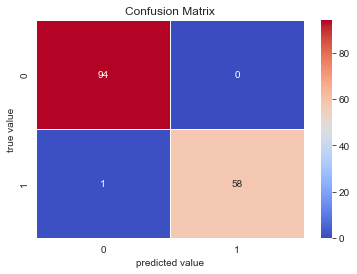

Classification Report : 
               precision    recall  f1-score   support

           R       0.99      1.00      0.99        94
          NR       1.00      0.98      0.99        59

    accuracy                           0.99       153
   macro avg       0.99      0.99      0.99       153
weighted avg       0.99      0.99      0.99       153



In [45]:
results = model_eval_df(logi_best)
#results

## K-Nearest Neighbors

For KNN algorithm I will test severl k in range 1-20 an then accourding to the train and test score xhoose the most conviniant k.

In [46]:
train_score_array = []
test_score_array = []

for k in range(1,20):
    knn = KNeighborsClassifier(k)
    knn.fit(X_train, y_train)
    train_score_array.append(knn.score(X_train, y_train))
    test_score_array.append(knn.score(X_test, y_test))

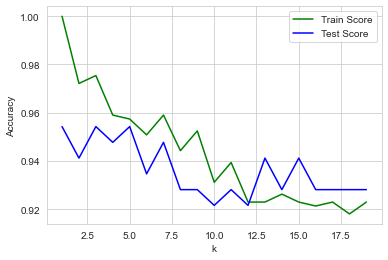

In [47]:
x_axis = range(1,20)
plt.plot(x_axis, train_score_array, label = 'Train Score', c = 'g')
plt.plot(x_axis, test_score_array, label = 'Test Score', c='b')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()

There is bent at K=10 which tells us that this is the optimal number of clusters probably the dataset is having.
Let's try to get the optimum parameters using the GridSearch.

In [48]:
knn = KNeighborsClassifier()

In [49]:
param_knn = { "n_neighbors": range(1,20),
               "leaf_size": (20, 30, 40)
             }
knn_best =  grid_search(knn, param_knn)

Fitting 10 folds for each of 57 candidates, totalling 570 fits
Best parameters: {'leaf_size': 20, 'n_neighbors': 1}


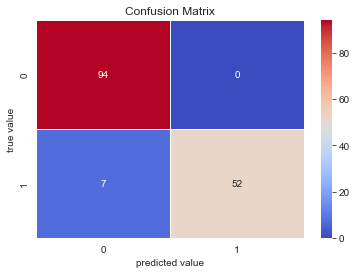

Classification Report : 
               precision    recall  f1-score   support

           R       0.93      1.00      0.96        94
          NR       1.00      0.88      0.94        59

    accuracy                           0.95       153
   macro avg       0.97      0.94      0.95       153
weighted avg       0.96      0.95      0.95       153



In [50]:
results = results.append(model_eval_df(knn_best))
#results

## Decision Tree

In [51]:
dtree = DecisionTreeClassifier()

In [52]:
#parameter for gridsearchcv
param_dtree = {
    "criterion": ['gini', 'entropy'],
    "max_depth": range(1,10),
    "min_samples_split": range(1,10),
    "min_samples_split": range(1,5)
}

dtree_best =  grid_search(dtree, param_dtree)

Fitting 10 folds for each of 72 candidates, totalling 720 fits
Best parameters: {'criterion': 'entropy', 'max_depth': 6, 'min_samples_split': 2}


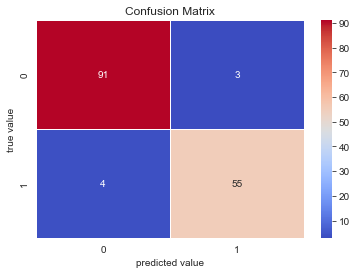

Classification Report : 
               precision    recall  f1-score   support

           R       0.96      0.97      0.96        94
          NR       0.95      0.93      0.94        59

    accuracy                           0.95       153
   macro avg       0.95      0.95      0.95       153
weighted avg       0.95      0.95      0.95       153



In [53]:
results = results.append(model_eval_df(dtree_best))
#results

## Support Vector Machine

Lets find the best gamma nad C parmeters for the SVM

In [54]:
svm = SVC()

In [55]:
#parameter for gridsearchcv
param_svm = { "kernel": ['sigmoid', 'rbf'],
              "gamma": [0.001, 0.01, 0.1, 1, 10, 100],
              "C" : [0.001, 0.01, 0.1, 1, 10, 100],
}

svm_best =  grid_search(svm, param_svm)

Fitting 10 folds for each of 72 candidates, totalling 720 fits
Best parameters: {'C': 10, 'gamma': 10, 'kernel': 'rbf'}


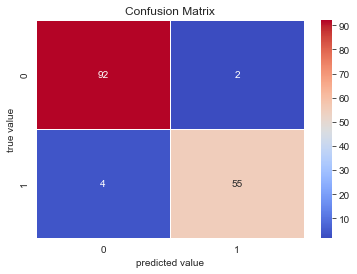

Classification Report : 
               precision    recall  f1-score   support

           R       0.96      0.98      0.97        94
          NR       0.96      0.93      0.95        59

    accuracy                           0.96       153
   macro avg       0.96      0.96      0.96       153
weighted avg       0.96      0.96      0.96       153



In [56]:
results = results.append(model_eval_df(svm_best))
#results

## MLP

In [57]:
mlp = MLPClassifier()

In [58]:
param_mlp = {
    'hidden_layer_sizes': [(10,30,10),(20,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

mlp_best =  grid_search(mlp, param_mlp)

Fitting 10 folds for each of 32 candidates, totalling 320 fits
Best parameters: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 30, 10), 'learning_rate': 'adaptive', 'solver': 'adam'}


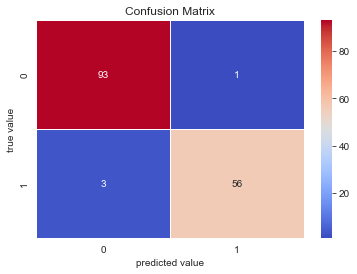

Classification Report : 
               precision    recall  f1-score   support

           R       0.97      0.99      0.98        94
          NR       0.98      0.95      0.97        59

    accuracy                           0.97       153
   macro avg       0.98      0.97      0.97       153
weighted avg       0.97      0.97      0.97       153



In [59]:
results = results.append(model_eval_df(mlp_best))
#results

## Random Forest

In [60]:
randforest = RandomForestClassifier()

In [61]:
param_rf = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

randforest_best =  grid_search(randforest, param_rf)

Fitting 10 folds for each of 60 candidates, totalling 600 fits
Best parameters: {'criterion': 'entropy', 'max_depth': 6, 'max_features': 'sqrt', 'n_estimators': 200}


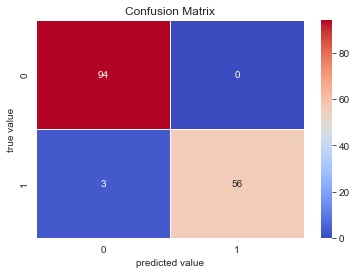

Classification Report : 
               precision    recall  f1-score   support

           R       0.97      1.00      0.98        94
          NR       1.00      0.95      0.97        59

    accuracy                           0.98       153
   macro avg       0.98      0.97      0.98       153
weighted avg       0.98      0.98      0.98       153



In [62]:
results = results.append(model_eval_df(randforest_best))
#results

## Gradient Boosting

In [63]:
gradboost = GradientBoostingClassifier()

In [64]:
param_gb = {
    "loss":["deviance"],
    "learning_rate": [0.01, 0.05, 0.1],
    'subsample'    : [0.9, 0.5, 0.1],
    'n_estimators' : [500,1000, 1500],
    'max_depth'    : [4,8,10]
    }

gradboost_best =  grid_search(gradboost, param_gb)

Fitting 10 folds for each of 81 candidates, totalling 810 fits
Best parameters: {'learning_rate': 0.01, 'loss': 'deviance', 'max_depth': 10, 'n_estimators': 1000, 'subsample': 0.9}


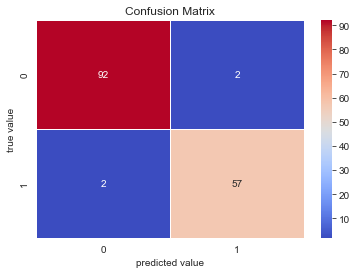

Classification Report : 
               precision    recall  f1-score   support

           R       0.98      0.98      0.98        94
          NR       0.97      0.97      0.97        59

    accuracy                           0.97       153
   macro avg       0.97      0.97      0.97       153
weighted avg       0.97      0.97      0.97       153



In [65]:
results = results.append(model_eval_df(gradboost_best))
#results

In [66]:
results.reset_index(drop=True)

,Model,Accuracy,Cross Val Accuracy,Precision,Recall,F1 Score,ROC
0,"LogisticRegression(C=6866.488450042998, random...",0.993464,0.985246,1.000000,0.983051,0.991453,0.991525
1,"KNeighborsClassifier(leaf_size=20, n_neighbors=1)",0.954248,0.959016,1.000000,0.881356,0.936937,0.940678
2,"DecisionTreeClassifier(criterion='entropy', ma...",0.954248,0.972131,0.948276,0.932203,0.940171,0.950144
3,"SVC(C=10, gamma=10)",0.960784,0.965574,0.964912,0.932203,0.948276,0.955463
4,"MLPClassifier(activation='tanh', hidden_layer_...",0.973856,0.960656,0.982456,0.949153,0.965517,0.969257
5,"(DecisionTreeClassifier(criterion='entropy', m...",0.980392,0.980328,1.000000,0.949153,0.973913,0.974576
6,([DecisionTreeRegressor(criterion='friedman_ms...,0.973856,0.975410,0.966102,0.966102,0.966102,0.972413


Based on the results, almost all the models performed really well on the dataset.Among all, **Logistic Regression** has the highest Recall score on this dataset. 
The recal is the most important metric here because we do not want to allow companies with any possible chance of fraud be activated.